# Loading Libraries and Data

In [ ]:
!pip install tensorflow-text

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf

import nltk
import spacy
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**LOADING THE DATA**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle1/train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Cleaning the data

Filling Nan Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
def fillna(df, column, fillwith):
  df[column] = df[column].fillna(fillwith)
  return df

In [13]:
for i in ['keyword','location']:
  df = fillna(df,i,'a')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
df.head()

,id,keyword,location,text,target
0,1,a,a,Our Deeds are the Reason of this #earthquake M...,1
1,4,a,a,Forest fire near La Ronge Sask. Canada,1
2,5,a,a,All residents asked to 'shelter in place' are ...,1
3,6,a,a,"13,000 people receive #wildfires evacuation or...",1
4,7,a,a,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
df['space'] = ' '
df['full_text'] = df['keyword'] + df['space'] + df['location']+ df['space'] + df['text']
df.drop('keyword', axis=1, inplace=True)
df.drop('location', axis=1, inplace=True)
df.drop('text', axis=1, inplace=True)
df.drop('space', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [17]:
df.head()

,target,full_text
0,1,a a Our Deeds are the Reason of this #earthqua...
1,1,a a Forest fire near La Ronge Sask. Canada
2,1,a a All residents asked to 'shelter in place' ...
3,1,"a a 13,000 people receive #wildfires evacuatio..."
4,1,a a Just got sent this photo from Ruby #Alaska...


Removing punctuation and stopwords.

In [18]:
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)
df["full_text"] = df.full_text.map(lambda x: remove_punct(x))

from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

df["full_text"] = df["full_text"].map(remove_stopwords)

In [19]:
df.head()

,target,full_text
0,1,deeds reason earthquake may allah forgive us
1,1,forest fire near la ronge sask canada
2,1,residents asked shelter place notified officer...
3,1,13000 people receive wildfires evacuation orde...
4,1,got sent photo ruby alaska smoke wildfires pou...


Visualising Named Entity

---
Visualising these can help us understand the features data might reply upon the most


In [98]:
df_dis = df[df['target']==1]
df_no_dis = df[df['target']==0]

In [95]:
#Func to represent randomly
nlp = spacy.load('en_core_web_sm')
def namedRandom(df):
  random = [np.random.randint(0,len(df)-1) for i in range(0,5)]
  for index in random:
    text = df.full_text.iloc[index]
    doc = nlp(text)
    spacy.displacy.render(doc, style="ent", jupyter=True)

In [96]:
namedRandom(df_dis)

In [99]:
namedRandom(df_no_dis)

**LOOKING AT THE WORD CLOUD**

In [114]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def cloudRandom(df, type):
  random = [np.random.randint(0,len(df)-1) for i in range(0,5)]
  text = ''
  for index in random:
    text = text + df.full_text.iloc[index]
  wc = WordCloud(background_color="white", 
               max_words=350, 
               width=1000, 
               height=600, 
               random_state=1).generate(text)
  
  plt.figure(figsize=(15,15))
  plt.imshow(wc)
  plt.axis("off")
  plt.title('Word Cloud for '+ (type) +' tweets')

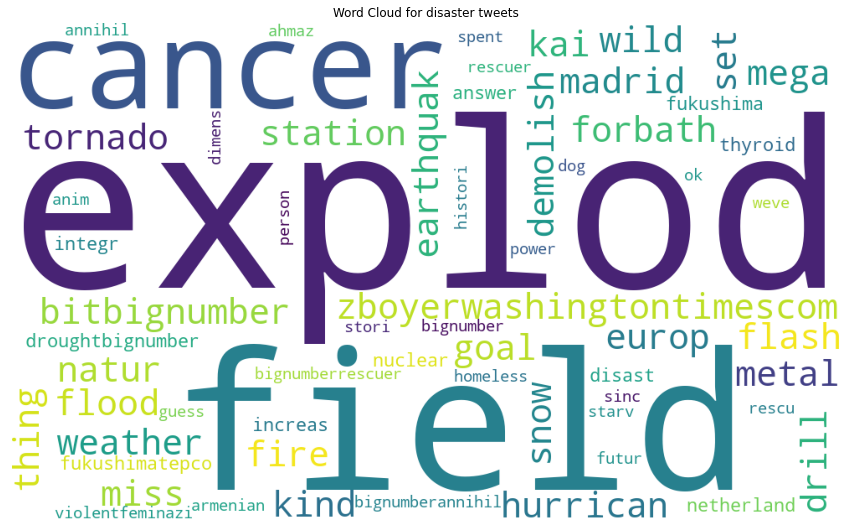

In [115]:
cloudRandom(df_dis, 'disaster')

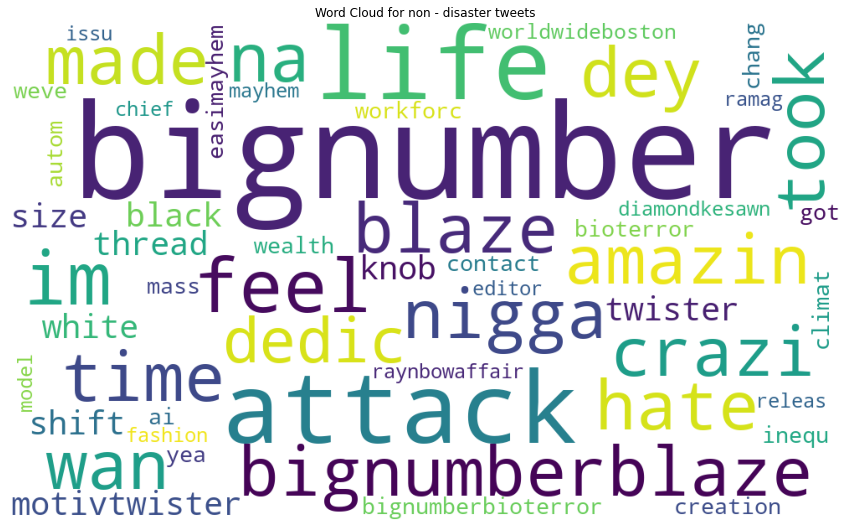

In [116]:
cloudRandom(df_no_dis, 'non - disaster')

Lemmetizing and Stemming the text

In [20]:
def getLemmText(text):
 tokens=word_tokenize(text)
 lemmatizer = WordNetLemmatizer()
 tokens=[lemmatizer.lemmatize(word) for word in tokens]
 return ' '.join(tokens)
df['full_text'] = list(map(getLemmText,df['full_text']))

def getStemmText(text):
 tokens=word_tokenize(text)
 ps = PorterStemmer()
 tokens=[ps.stem(word) for word in tokens]
 return ' '.join(tokens)
df['full_text'] = list(map(getStemmText,df['full_text']))

# Exploratory data analysis after cleaning

In [25]:
#defining visualisation params
fig_dims = (10, 8)

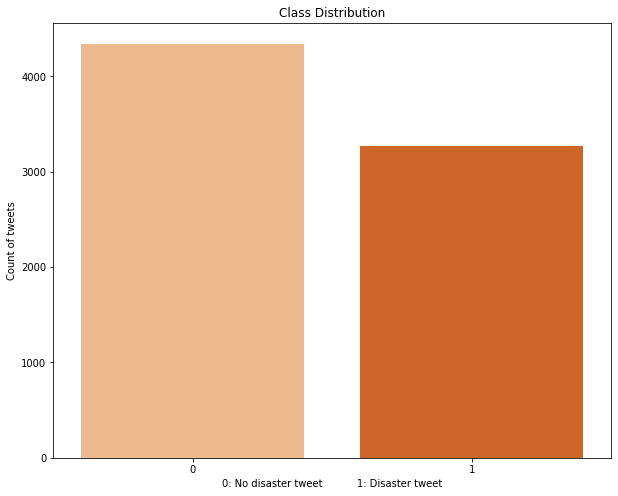

In [31]:
#Looking at class distribution to see if it is balanced
classes = df['target']
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = classes, ax=ax, palette='Oranges')
plt.title('Class Distribution')
plt.xlabel('0: No disaster tweet           1: Disaster tweet')
plt.ylabel('Count of tweets')
plt.show()

Looks well balanced

In [80]:
# Removing # and @ from the tweets.
def removetags(text):
  tags = ['@','#']
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in tags]
  return ' '.join(tokens)
df['full_text'] = list(map(removetags,df['full_text']))

Checking for Big Numbers if they can be considered as features or not.

In [45]:
#Logic to find big numbers
for i in df.full_text[3].split():
  print(i)

13000
peopl
receiv
wildfir
evacu
order
california


In [69]:
#Function to check bigNumbers Count
def bigNumCount(df):
  bigNum_Count = []
  truth_val = []
  for text in df.full_text:
    for token in text.split():
      if token.isnumeric():
        try:
          if int(token)>10000:
            bigNum_Count.append(text)
            break
        except:
          pass
  return bigNum_Count

In [70]:
#Looking at the Big number analysis
#looking at BigNumbers in entire dataset
df_entire_BigNum = bigNumCount(df)
# If there are more than 300 bigNum tweets we'll consider big numbers as features
print('There are '+ str(len(df_entire_BigNum)) +' big Numbers in the entire dataset.')

There are 185 big Numbers in the entire dataset.


In [71]:
#Looking at the Big number analysis
#looking at BigNumbers in disaster dataset
df_dis = df[df['target']==1]
df_dis_BigNum = bigNumCount(df_dis)
# If there are more than 100 bigNum tweets we'll consider big numbers as features
print('There are '+ str(len(df_dis_BigNum)) +' big Numbers in the disaster dataset.')

There are 110 big Numbers in the disaster dataset.


In [79]:
#Defining a function to replace 
def replaceNumbers(text):
  tokens = word_tokenize(text)
  tokens = [word if word.isalpha() else 'bignumber' for word in tokens]
  return ' '.join(tokens)
print('Example:')
print('text : 13000 one guy')
print(replaceNumbers('result : 13000 one guy'))
df['full_text'] = list(map(replaceNumbers,df['full_text']))

Example:
text : 13000 one guy
result bignumber bignumber one guy


In [81]:
## Code to remove numbers If you decide otherwise.
# def removeNumbers(text):
#   tokens = word_tokenize(text)
#   tokens = [word for word in tokens if word.isalpha()]
#   return ' '.join(tokens)

# df['full_text'] = list(map(removeNumbers,df['full_text']))

In [82]:
df.head()

,target,full_text
0,1,deed reason earthquak may allah forgiv u
1,1,forest fire near la rong sask canada
2,1,resid ask shelter place notifi offic evacu she...
3,1,bignumber peopl receiv wildfir evacu order cal...
4,1,got sent photo rubi alaska smoke wildfir pour ...


# Training The model using BERT

In [117]:
labels = df.target

In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(df.full_text.values, labels, 
 random_state=42, test_size=0.3, shuffle=True, stratify = labels)

Choosing BERT model for training

In [119]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [120]:
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder)

In [121]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [122]:
# with tpu_strategy.scope(): creating the model in the TPUStrategy scope means we will train the model on the TPU
# model = create_model()

In [123]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [125]:
model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), batch_size=)

Epoch 1/10
167/167 [==============================] - 530s 3s/step - loss: 0.6173 - accuracy: 0.6647 - val_loss: 0.5772 - val_accuracy: 0.7088
Epoch 2/10
167/167 [==============================] - 531s 3s/step - loss: 0.5809 - accuracy: 0.7005 - val_loss: 0.5594 - val_accuracy: 0.7246
Epoch 3/10
167/167 [==============================] - 534s 3s/step - loss: 0.5731 - accuracy: 0.7088 - val_loss: 0.5504 - val_accuracy: 0.7316
Epoch 4/10
167/167 [==============================] - 533s 3s/step - loss: 0.5589 - accuracy: 0.7189 - val_loss: 0.5486 - val_accuracy: 0.7312
Epoch 5/10
167/167 [==============================] - 530s 3s/step - loss: 0.5513 - accuracy: 0.7238 - val_loss: 0.5418 - val_accuracy: 0.7412
Epoch 6/10
167/167 [==============================] - 530s 3s/step - loss: 0.5530 - accuracy: 0.7277 - val_loss: 0.5379 - val_accuracy: 0.7465
Epoch 7/10
167/167 [==============================] - 531s 3s/step - loss: 0.5484 - accuracy: 0.7232 - val_loss: 0.5359 - val_accuracy: 0.7496

# Result Evaluation

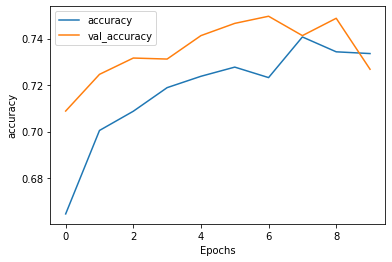

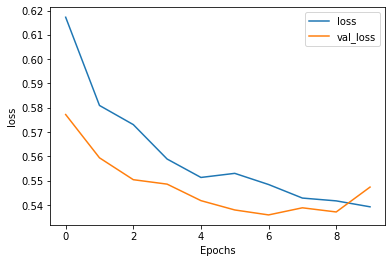

In [127]:
def graph_plots(history, string):
 plt.plot(history.history[string])
 plt.plot(history.history['val_'+string])
 plt.xlabel('Epochs')
 plt.ylabel(string)
 plt.legend([string, 'val_'+string])
 plt.show()
 
graph_plots(model.history, 'accuracy')
graph_plots(model.history, 'loss')

In [131]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
predicted = model.predict(xtest)

In [132]:
np.unique(predicted)

array([0.02669549, 0.03303197, 0.03305084, ..., 0.9680811 , 0.9710748 ,
       0.97299016], dtype=float32)

In [134]:
results = []
for i in predicted:
  if i>0.5:
    results.append(1)
  else:
    results.append(0)

In [137]:
real = np.array(ytest)
predicted = results

In [138]:
print(classification_report(real,predicted))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1303
           1       0.65      0.77      0.71       981

    accuracy                           0.73      2284
   macro avg       0.73      0.73      0.73      2284
weighted avg       0.74      0.73      0.73      2284



# Submission

In [139]:
subtest = pd.read_csv('/content/drive/MyDrive/Kaggle1/test.csv')
subtest.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Data Pre-processing on Test data

In [140]:
for i in ['keyword','location']:
  subtest = fillna(subtest,i,'a')

subtest['space'] = ' '
subtest['full_text'] = subtest['keyword'] + subtest['space'] + subtest['location']+ subtest['space'] + subtest['text']
subtest.drop('keyword', axis=1, inplace=True)
subtest.drop('location', axis=1, inplace=True)
subtest.drop('text', axis=1, inplace=True)
subtest.drop('space', axis=1, inplace=True)
subtest.drop('id', axis=1, inplace=True)

subtest["full_text"] = subtest.full_text.map(lambda x: remove_punct(x))
subtest["full_text"] = subtest["full_text"].map(remove_stopwords)

subtest['full_text'] = list(map(getLemmText,subtest['full_text']))
subtest['full_text'] = list(map(getStemmText,subtest['full_text']))

subtest['full_text'] = list(map(removetags,subtest['full_text']))
subtest['full_text'] = list(map(replaceNumbers,subtest['full_text']))

In [141]:
subtest.head()

,full_text
0,happen terribl car crash
1,heard earthquak differ citi stay safe everyon
2,forest fire spot pond goos flee across street ...
3,apocalyps light spokan wildfir
4,typhoon soudelor kill bignumber china taiwan


In [142]:
test_pred = model.predict(subtest)
submission = pd.read_csv("sample_submission.csv")
submission['target'] = test_pred.round().astype(int)
submission.to_csv('sub.csv', index=False)